# Sampling and Sampling Distributions

A key connection between probability and statistics is the concept of **sampling distributions**.

## Sampling

Before we dig into sampling distributions and statistical theory, we need to understand sampling. We have several pre-packaged commands in R that allow is to quickly generate sample data from a specific distribution. We can also sample rows from a dataframe. The pages in this section will demonstrate how to use these functions together with specific examples.

## Sampling Distributions

**Definition.** For a fixed population and fixed sample size, the collection of all possible values of the mean over all possible samples of that size, forms what we call the **sampling distribution**.

The statistical theory involved includes:

- Central Limit Theorem (CLT)
- Law of Large Numbers

## Law of Large Numbers

If $\overline{X}_n$ is the average of $n$ many $x_i$ all drawn from the same population/distribution with mean $\mu$ then as $n$ increases, $\overline{X}_n$ will approach $\mu$.  

when our sample size is very large, you can have some confidence that the sample average is "pretty close" to the population average.


## Central Limit Theorem

Assume $\overline{X}_n$ is the average of $n$ many $x_i$ all drawn from the same population/distribution with mean $\mu$ and population standard deviation $\sigma$.  Then $\overline{X}_n$ is a member of a sampling distribution. For large values of $n$, this sampling distribution can be assumed approximately normal. Specifically, the sampling distribution can be assumed to be

$$N\left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$

## Getting Started

To prepare for the examples and demonstrations, we two things. First, we need data to work with. Second, we need our main sampling function: **sample.data.frame**.

**Run the cell below to load 4 data sets.**

In [3]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
p <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

Now that we have data sets to sample from, we will need the function that actually performs the sampling. Again, this code is adapted from the documentation of the classic *mosaic* package which is still available in R given that you have the correct versioning for R and all mosaic's required dependencies.

**Run the cell below to activate the function:**

<font color="green"><center><b>sample.data.frame</b></center></font>

In [4]:
sample.data.frame <- function(x, size, replace = FALSE, prob = NULL, groups=NULL, 
                              orig.ids = TRUE, fixed = names(x), shuffled = c(),
                              invisibly.return = NULL, ...) {
  if( missing(size) ) size = nrow(x)
  if( is.null(invisibly.return) ) invisibly.return = size>50 
  shuffled <- intersect(shuffled, names(x))
  fixed <- setdiff(intersect(fixed, names(x)), shuffled)
  n <- nrow(x)
  ids <- 1:n
  groups <- eval( substitute(groups), x )
  newids <- sample(n, size, replace=replace, prob=prob, ...)
  origids <- ids[newids]
  result <- x[newids, , drop=FALSE]
  
  idsString <- as.character(origids)
  
  for (column in shuffled) {
    cids <- sample(newids, groups=groups[newids])
    result[,column] <- x[cids,column]
    idsString <- paste(idsString, ".", cids, sep="")
  }
  
  result <-  result[ , union(fixed,shuffled), drop=FALSE]
  if (orig.ids) result$orig.id <- idsString
  
  
  if (invisibly.return) { return(invisible(result)) } else {return(result)}
}

## Example: Estimating Narcissism

Let's work with an example from the **personality** data set: narcissism. Let's generate many, many samples of the same size. We'll find the averages from each sample and use them to estimate the average level of narcissism for students at UNG.

### First Step: Generating Samples of Size $n=10$

Let's beging with the R commands necessary to sample the **Narc** column in the *personality* data frame. We will use the

<center><font color="red"><b>sample.data.frame()</b></font></center>

function to draw a sample.

**Run the cell below to see how this works, and notice:**

- The function inputs:
1. Name of the data frame to sample from.
2. Sample size to be drawn.
- The output: 10 rows from the data frame with all columns present.

In [5]:
s <- sample.data.frame(p, 10, orig.ids = FALSE)
head(s,15)

,Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,...,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
106,18,2,F,N,N,3,N,N,N,3.67,...,112,6,122,10,2,43,36,28,22,AF
90,19,1,M,N,N,1,N,N,N,2.80,...,123,9,125,2,3,37,34,29,39,SD
20,23,3,M,Y,N,2,N,N,Y,3.22,...,101,9,155,14,8,56,44,26,20,AF
57,20,2,M,N,Y,1,N,N,N,1.89,...,100,9,151,15,5,53,46,36,37,AF
12,20,2,F,N,N,1,Y,N,N,3.26,...,63,7,95,10,9,32,26,30,22,AG
14,20,3,M,N,Y,1,Y,N,N,3.30,...,130,15,118,7,8,41,38,32,25,AG
119,21,3,F,Y,N,2,Y,N,N,3.35,...,85,7,150,10,1,46,39,25,32,AF
28,19,1,F,N,N,1,N,N,N,3.18,...,112,9,170,11,7,52,47,23,15,SE
94,19,2,F,N,N,1,N,N,Y,3.31,...,81,5,158,14,3,54,55,21,23,SE
7,18,1,M,N,Y,1,N,N,N,3.17,...,49,20,114,10,9,56,45,41,38,AG


We can find the average narcissism for these 10 persons by subsetting our sample data frame **s**.

In [6]:
mean(s[ , 'Narc'])

[1] 5.5

**Putting it Together.** Eventually, we want to run a loop that does this a thousand or more times. Thus, we prefer a single line of code that will do it for us all at once. We wrap the *sample.data.frame()* function inside the *mean* function as shown below.

**Run the code below multiple times to see how we're sampling plus finding the average Narcissism level for each.**

In [7]:
mean(sample.data.frame(p, 10, orig.ids = F)[ , 'Narc'])

[1] 4.1

### Step 2: Creating a for Loop

The steps make sense if we consider them separately:

1. Create **all_means**, an initially empty vector where we plan to store our sample means.
2. Create a for loop that will a thousand times.
3. Inside the loop, we will:
  - Gather a sample of size $n=10$.
  - Calcuate the mean.
  - Add this value to the **all_means** vector.

In [9]:
all_means <- c()                                         #Empty vector to store all the sample means
for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)     #Generate a sample (size n=10)
    all_means[count] <- mean(sample[ , 'Narc'])          #Save the mean of this sample in my list
}

Notice that we now have a vector **all_means**, so we display the distribution in a histogram and caculate various statistics.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   4.100   4.700   4.675   5.200   7.100 

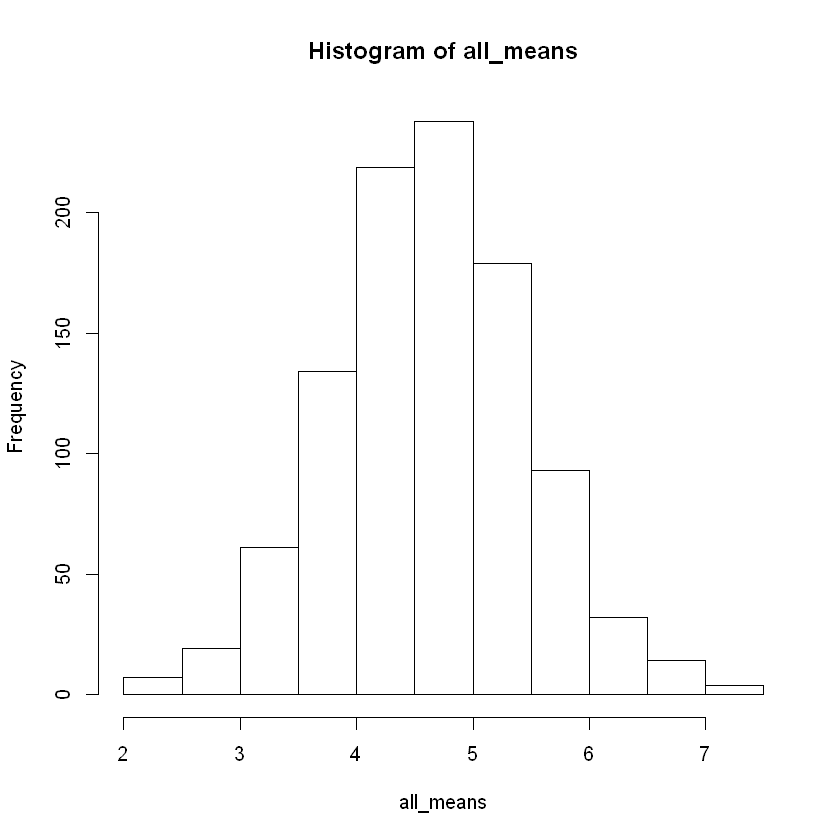

In [10]:
summary(all_means)
hist(all_means)

### Step 3: The Middle 90% of the Distribution

Because we intend to use the sampling distributions to estimate the population average, we need a way to gather an interval. This interval will be our estimated range of values. For the moment, let's use the **middle 90%** of the **all_means** vector. We will need the endpoints, e.g. the 5th and 95th percentiles from the vector.

In [11]:
lower <- quantile(all_means, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(all_means, prob = 0.95)     # Calcuate the 95th percentile.
cat('The middle 90% of the all_means vector is (',lower,',',upper,').')

The middle 90% of the all_means vector is ( 3.2 , 6.005 ).

### Step 4: The Histogram with Vertical Lines Showing the 5th and 95th Percentiles

We use the function **abline()** to superimpose vertical lines onto our histogram. We've already calculated the values for the 5th and 95th percentiles. We need only to use the option **v** which draws a *vertical line* at the value indicated. The color option is not vital for our purposes, but a splash of color is visually appealing.

As we go forward, we will see that increased sample size will lead to a narrower bell-shape. In other words, the size of the standard deviation will become important, so let's include that in the text we print out using the **cat()** function.

Standard deviation of sampling distribution: 0.8546522 
The middle 90% of the sampling distribution: is ( 3.2 , 6.005 ).

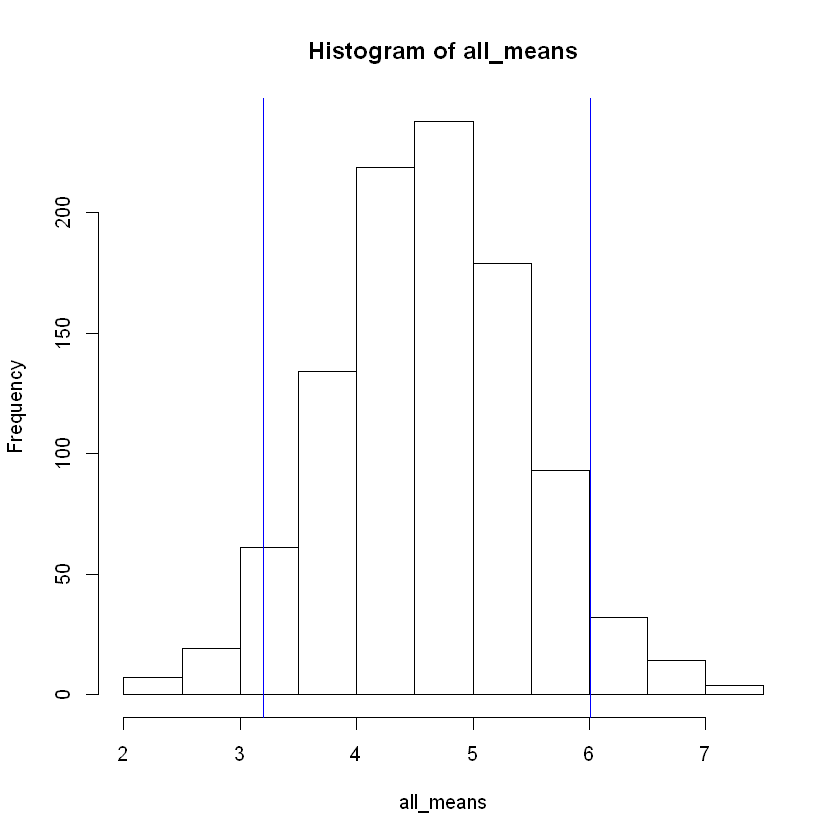

In [12]:
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Step 5: Performing all Tasks in 1 Code Block

Now that we have unpacked each command line needed, we can put it all together into one code block. We have also added the parameters **reps** and **samp_size** as the top 2 lines to make it easy to set them to a single value. Doing these tasks will help to quickly generate different sampling distributions for different sample sizes **n**.

Standard deviation of sampling distribution: 0.836893 
The middle 90% of sampling distribution: ( 3.3 , 6.1 ).

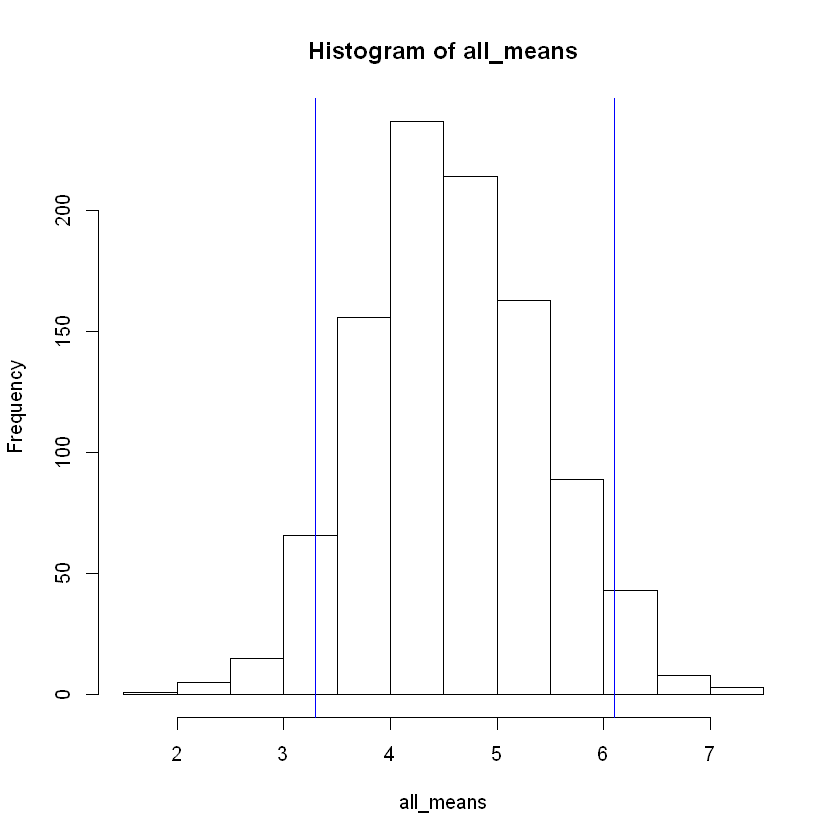

In [14]:
reps = 1000          # Number of repetitions of FOR loop
samp_size = 10       # Sample size to be drawn
all_means <- c()     # Empty vector to store all the sample means

for (count in 1:reps){
    sample <- sample.data.frame(p, 10, orig.ids = F)
    all_means[count] <- mean(sample[ , 'Narc'])
}

upper <- quantile(all_means, prob = 0.95)
lower <- quantile(all_means, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of sampling distribution: (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")